In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,precision_score,recall_score
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xg


Data Collection and Analysis

Diabetes Dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes_sl.csv')

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Displays top 5 rows

In [4]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


- Displays bottom 5 rows

In [5]:
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

- We have all numeric columns

In [6]:
diabetes_dataset.shape

(768, 9)

- There are 786 rows and 9 columns in the dataset

# Meaures of Central Tendency

In [7]:
# summary statistics of numerical column
diabetes_dataset.describe(include='number')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- we see that min values and max values of each colum
- Mean of age is 33
- lower quartile Q1 for bmi is 27.30 and upper quartile is 36.6


In [8]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There are no null values in the dataset

- Data Visualisation

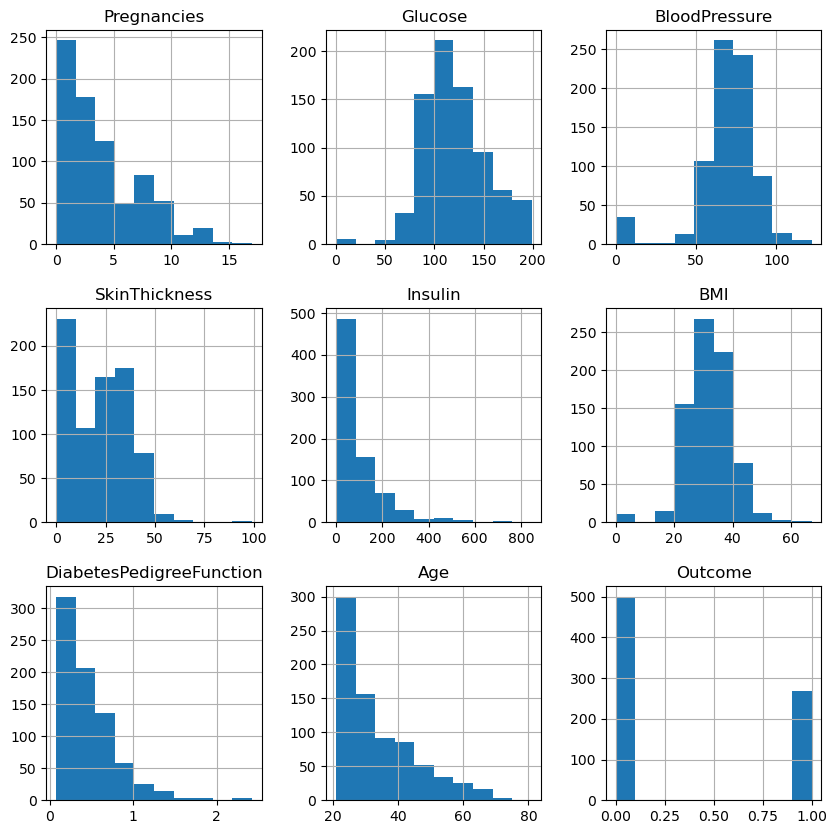

In [9]:
#histogram for each feature
diabetes_dataset.hist(bins=10,figsize=(10,10))
plt.show()

-  We see that Glucose and Blood Pressure are normally distributed rest others are skewed and have outliers


<Axes: xlabel='DiabetesPedigreeFunction'>

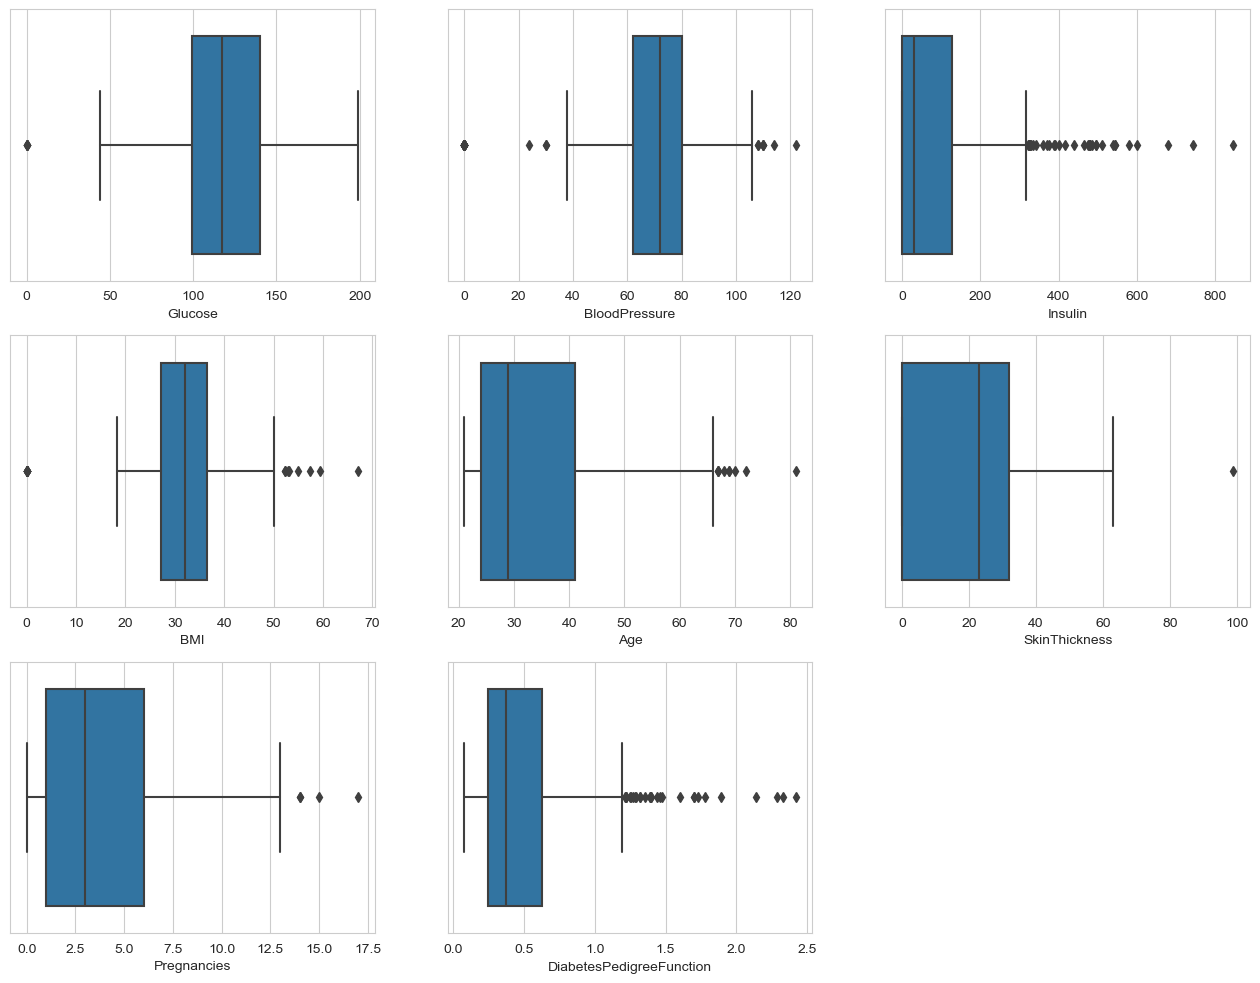

In [10]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=diabetes_dataset)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=diabetes_dataset)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=diabetes_dataset)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=diabetes_dataset)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=diabetes_dataset)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=diabetes_dataset)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=diabetes_dataset)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=diabetes_dataset)

<Axes: xlabel='Outcome', ylabel='count'>

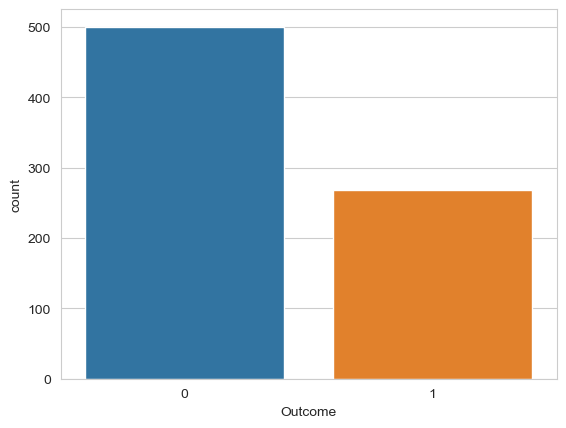

In [11]:
sns.countplot(x='Outcome', data=diabetes_dataset)

- in the above graph it shows that number of people having diabetes are very less compared to those who have diabetes

In [12]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [13]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Data Preprocessing

In [14]:
#replacing 0 values with mean values if data is normally distributed and with median values if its a skewed distribution 
diabetes_dataset['Glucose']=diabetes_dataset['Glucose'].replace(0,diabetes_dataset['Glucose'].mean())#normal distribution
diabetes_dataset['BloodPressure']=diabetes_dataset['BloodPressure'].replace(0,diabetes_dataset['BloodPressure'].mean())#normal distribution
diabetes_dataset['SkinThickness']=diabetes_dataset['SkinThickness'].replace(0,diabetes_dataset['SkinThickness'].median())#skewed distribution
diabetes_dataset['Insulin']=diabetes_dataset['Insulin'].replace(0,diabetes_dataset['Insulin'].median())#skewed distribution
diabetes_dataset['BMI']=diabetes_dataset['BMI'].replace(0,diabetes_dataset['BMI'].median())#skewed distribution

In [15]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [16]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0             35     30.5  33.6   
1              1     85.0           66.0             29     30.5  26.6   
2              8    183.0           64.0             23     30.5  23.3   
3              1     89.0           66.0             23     94.0  28.1   
4              0    137.0           40.0             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0             48    180.0  32.9   
764            2    122.0           70.0             27     30.5  36.8   
765            5    121.0           72.0             23    112.0  26.2   
766            1    126.0           60.0             23     30.5  30.1   
767            1     93.0           70.0             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [21]:
import xgboost
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
import mlflow

In [23]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Define the experiment name
experiment_name = "diabetes_prediction_experiment"

# Check if the experiment exists
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is None:
    # If the experiment does not exist, create it
    mlflow.create_experiment(experiment_name)

# Set the experiment
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/115577362116293050', creation_time=1706340926690, experiment_id='115577362116293050', last_update_time=1706340926690, lifecycle_stage='active', name='diabetes_prediction_experiment', tags={}>

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import mlflow

# Assuming you have X_train, Y_train, X_test, Y_test defined

# Define hyperparameters grid for each classifier
param_grid = {
    'LogisticRegression': {'C': [0.1, 1.0, 10.0]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'SVC': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01]}
}

# List of classifiers
al_list = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    GradientBoostingClassifier()
]

for classifier in al_list:
    # Retrieve the hyperparameters grid for the current classifier
    params = param_grid[classifier.__class__.__name__]

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(classifier, params, scoring='accuracy', cv=3)
    grid_search.fit(X_train, Y_train)

    # Get the best estimator and its parameters
    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Use the best estimator to make predictions
    y_train_pred = best_estimator.predict(X_train)
    y_test_pred = best_estimator.predict(X_test)

    # Calculate metrics
    accuracy_train = accuracy_score(Y_train, y_train_pred)
    accuracy_test = accuracy_score(Y_test, y_test_pred)
    recall_train = recall_score(Y_train, y_train_pred)
    recall_test = recall_score(Y_test, y_test_pred)
    f1_train = f1_score(Y_train, y_train_pred)
    f1_test = f1_score(Y_test, y_test_pred)

    # Print metrics
    print(f'Metrics for {classifier.__class__.__name__}:')
    print(f'  Best Parameters: {best_params}')
    print(f'  Accuracy (Train): {accuracy_train:.4f}')
    print(f'  Accuracy (Test):  {accuracy_test:.4f}')
    print(f'  Recall (Train):   {recall_train:.4f}')
    print(f'  Recall (Test):    {recall_test:.4f}')
    print(f'  F1 Score (Train): {f1_train:.4f}')
    print(f'  F1 Score (Test):  {f1_test:.4f}')

    # MLflow logging
    with mlflow.start_run(run_name=str(classifier.__class__.__name__)):
        mlflow.log_params(best_params)
        mlflow.log_metric("accuracy_train", accuracy_train)
        mlflow.log_metric("accuracy_test", accuracy_test)
        mlflow.log_metric("recall_train", recall_train)
        mlflow.log_metric("recall_test", recall_test)
        mlflow.log_metric("f1_train", f1_train)
        mlflow.log_metric("f1_test", f1_test)


Metrics for LogisticRegression:
  Best Parameters: {'C': 1.0}
  Accuracy (Train): 0.7687
  Accuracy (Test):  0.7468
  Recall (Train):   0.5701
  Recall (Test):    0.5370
  F1 Score (Train): 0.6321
  F1 Score (Test):  0.5979
Metrics for RandomForestClassifier:
  Best Parameters: {'max_depth': 10, 'n_estimators': 100}
  Accuracy (Train): 0.9951
  Accuracy (Test):  0.7597
  Recall (Train):   0.9860
  Recall (Test):    0.5185
  F1 Score (Train): 0.9929
  F1 Score (Test):  0.6022
Metrics for SVC:
  Best Parameters: {'C': 10.0, 'kernel': 'linear'}
  Accuracy (Train): 0.7752
  Accuracy (Test):  0.7727
  Recall (Train):   0.5701
  Recall (Test):    0.5185
  F1 Score (Train): 0.6387
  F1 Score (Test):  0.6154
Metrics for GradientBoostingClassifier:
  Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
  Accuracy (Train): 0.8274
  Accuracy (Test):  0.7597
  Recall (Train):   0.6682
  Recall (Test):    0.4815
  F1 Score (Train): 0.7296
  F1 Score (Test):  0.5843


Making a Predictive System